In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as scp
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv('data/Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data = data.iloc[:,3:5].values

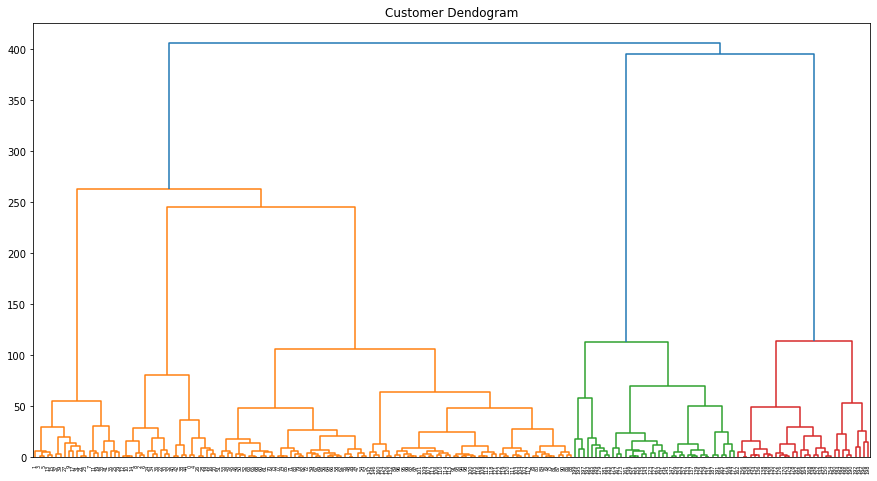

In [4]:
plt.figure(figsize=(15,8))
plt.title('Customer Dendogram - Ward')
dend = scp.dendrogram(scp.linkage(data,method='ward'))

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Customer Dendogram - Single')
dend = scp.dendrogram(scp.linkage(data,method='single'))

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Customer Dendogram - Average')
dend = scp.dendrogram(scp.linkage(data,method='average'))

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Customer Dendogram - Complete')
dend = scp.dendrogram(scp.linkage(data,method='complete'))

In [5]:
clust = AgglomerativeClustering(n_clusters=5)
labels_ = clust.fit_predict(data)

In [6]:
labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

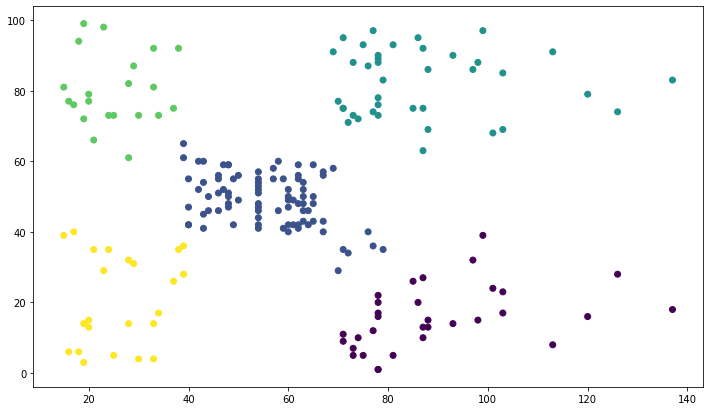

In [7]:
plt.figure(figsize=(12,7))
plt.scatter(data[:,0],data[:,1],c=labels_)

In [8]:
clust_s = AgglomerativeClustering(n_clusters=5,linkage='single')
labels_s = clust_s.fit_predict(data)
clust_c = AgglomerativeClustering(n_clusters=5,linkage='complete')
labels_c = clust_c.fit_predict(data)
clust_avg = AgglomerativeClustering(n_clusters=5,linkage='average')
labels_avg = clust_avg.fit_predict(data)
clust_w = AgglomerativeClustering(n_clusters=5,linkage='ward')
labels_w = clust_w.fit_predict(data)

Text(0.5, 1.0, 'Single Linkage')

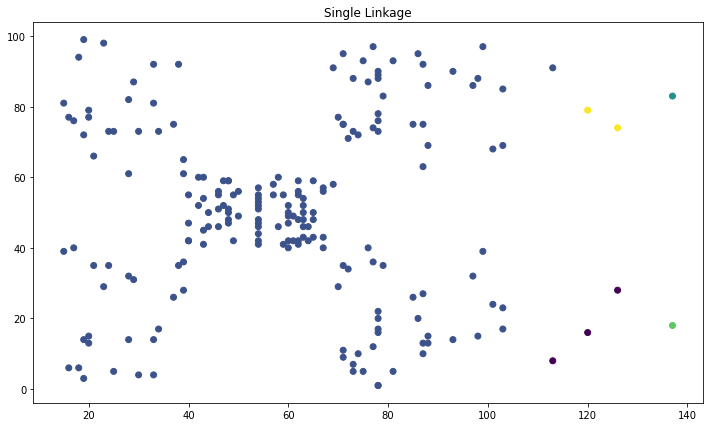

In [9]:
plt.figure(figsize=(12,7))
plt.scatter(data[:,0],data[:,1],c=labels_s)
plt.title('Single Linkage')

Text(0.5, 1.0, 'Complete Linkage')

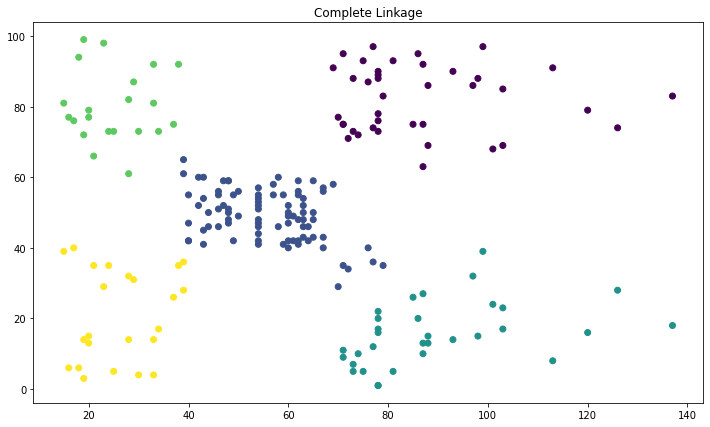

In [10]:
plt.figure(figsize=(12,7))
plt.scatter(data[:,0],data[:,1],c=labels_c)
plt.title('Complete Linkage')

Text(0.5, 1.0, 'Average Linkage')

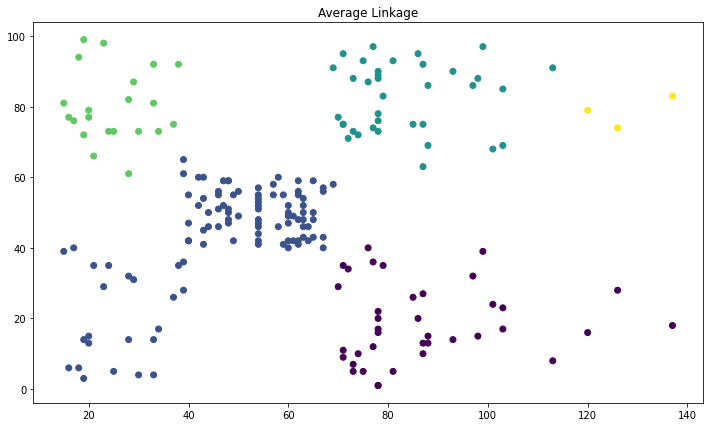

In [11]:
plt.figure(figsize=(12,7))
plt.scatter(data[:,0],data[:,1],c=labels_avg)
plt.title('Average Linkage')

Text(0.5, 1.0, 'Ward Linkage')

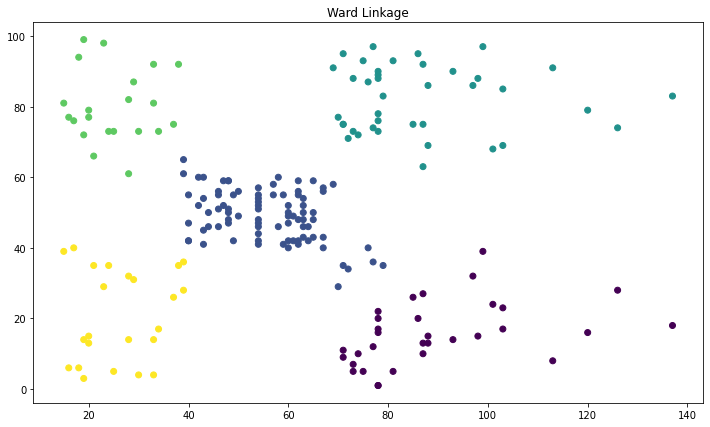

In [12]:
plt.figure(figsize=(12,7))
plt.scatter(data[:,0],data[:,1],c=labels_w)
plt.title('Ward Linkage')

In [13]:
models = [labels_s,labels_c,labels_avg,labels_w]
scores = []
for labels in models :
    score = silhouette_score(data,labels)
    scores.append(score)

In [14]:
scores

[0.2694896445402342,
 0.5529945955148897,
 0.4791911539647448,
 0.5529945955148897]

In [15]:
dic = {'single':scores[0],
       'complete':scores[1],
       'average':scores[2],
       'ward':scores[3]}
df = pd.DataFrame(dic,index=[0])

In [16]:
df

,single,complete,average,ward
0,0.26949,0.552995,0.479191,0.552995


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


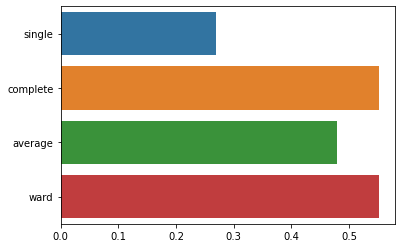

In [17]:
sns.barplot(scores,df.columns);

In [18]:
import sys
!{sys.executable} -m pip install jcvi

^C
